Impor Pustaka yang digunakan

In [5]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


mnampilkan data set

In [6]:
df = pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Memuat Dataset

In [7]:
iris = load_iris()
X = iris.data
y = iris.target

Memisahkan Data menjadi Data Pengujian dan Data Pelatihan

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Melatih Model Random Forest

In [9]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
y_pred = rf_model.predict(X_test)

In [11]:


def predict_iris(sepal_length, sepal_width, petal_length, petal_width):
  new_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
  prediction = rf_model.predict(new_data)
  if prediction[0] == 0:
    return "Setosa"
  elif prediction[0] == 1:
    return "Versicolor"
  else:
    return "Virginica"

sepal_length = 6.1
sepal_width = 2.8
petal_length = 4.7
petal_width = 1.2

predicted_class = predict_iris(sepal_length, sepal_width, petal_length, petal_width)
print(f"Predicted class for the given parameters: {predicted_class}")


Predicted class for the given parameters: Versicolor


In [12]:
X_test

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.1, 1.6, 0.2]])

Evaluasi Kinerja Model Random Forest

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy:.2f}')

Akurasi: 1.00


In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [15]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Memvisualisasikan Hasil KInerja Model RRandom Forest Classifier

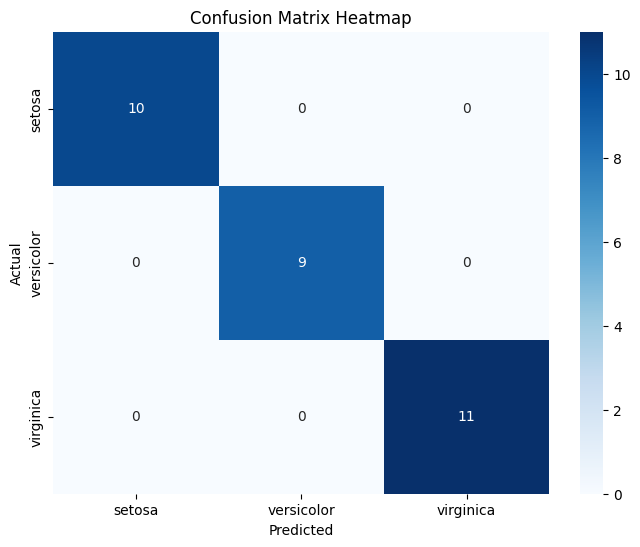

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [17]:
df_results = pd.DataFrame(X_test, columns=iris.feature_names)
df_results['Actual Species'] = y_test
df_results['Predicted Species'] = y_pred

In [18]:
df_results['Actual Species'] = df_results['Actual Species'].apply(lambda x: iris.target_names[x])
df_results['Predicted Species'] = df_results['Predicted Species'].apply(lambda x: iris.target_names[x])

In [19]:
print(df_results)

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 6.1               2.8                4.7               1.2   
1                 5.7               3.8                1.7               0.3   
2                 7.7               2.6                6.9               2.3   
3                 6.0               2.9                4.5               1.5   
4                 6.8               2.8                4.8               1.4   
5                 5.4               3.4                1.5               0.4   
6                 5.6               2.9                3.6               1.3   
7                 6.9               3.1                5.1               2.3   
8                 6.2               2.2                4.5               1.5   
9                 5.8               2.7                3.9               1.2   
10                6.5               3.2                5.1               2.0   
11                4.8               3.0 